In [1]:
import numpy as np 
import sympy as smp
import scipy as sp 
import matplotlib.pyplot as plt 
from scipy.misc import derivative

In [5]:
x, a, b, c = smp.symbols('x a b c', real=True)
f = smp.exp(-a*smp.sin(x**2)) * smp.sin(b**x) * smp.log(c*smp.sin(x)**2 /x)
dfdx = smp.diff(f, x)
dfdx.subs([(x,4), (a,1), (b,2), (c,3)]).evalf()

13.8869214780286

In [6]:
f


exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)

In [7]:
dfdx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

In [9]:
d4fdx4 = smp.diff(f, x, 4)

In [10]:
d4fdx4.subs([(x,4),(a,1),(b,2),(c,3)]).evalf()

-73035.8044625845

In [11]:
d4fdx4_f = smp.lambdify((x,a,b,c), d4fdx4)

In [12]:
x = np.linspace(1,2,100)
x = np.linspace(1,2,100)
y = d4fdx4_f(x, a=1, b=2, c=3)


Text(0.5, 0, '$x$')

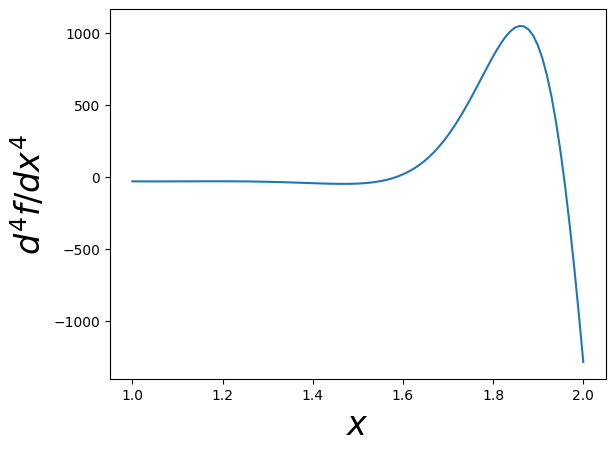

In [13]:
plt.plot(x,y)
plt.ylabel('$d^4 f / dx^4$', fontsize=24)
plt.xlabel('$x$', fontsize=24)

In [ ]:
x, y = np.loadtxt('../data/sample_data1.txt')

In [ ]:
plt.plot(x, y, 'o--')

In [ ]:
dydx = np.gradient(y,x)

In [ ]:
plt.plot(x,y, 'o--', label='$y(x)$')
plt.plot(x,dydx, 'o--', label='$y\'(x)$')
plt.legend()

In [ ]:
x, y = np.loadtxt('../data/sample_data2.txt')
dydx = np.gradient(y,x)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
[a.legend() for a in ax]
plt.show()

In [ ]:
x, y = np.loadtxt('../data/coviddata.txt')
dydx = np.gradient(y,x)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
[a.legend() for a in ax]
plt.show()

In [ ]:
filt = np.ones(15)/15
y_smooth = np.convolve(y, filt, mode='valid')
dysdx = np.gradient(y_smooth, x[7:-7])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[0].plot(x[7:-7], y_smooth, label=r'$y_{{smooth}}(x)$')
ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
ax[1].plot(x[7:-7],dysdx, label='$y_{smooth}\'(x)$', color='purple')
ax[1].set_ylim(-100,120)
ax[1].grid()
[a.legend() for a in ax]
[a.set_xlabel('Time [Days]') for a in ax]
ax[0].set_ylabel('Cases per Day')
ax[1].set_ylabel('$\Delta$ (Cases per Day) / $\Delta t$')
fig.tight_layout()
plt.show()

In [14]:
x = np.linspace(0, 1, 500)
y = np.exp(-x*2.15**2) + 0.1*np.random.randn(len(x))

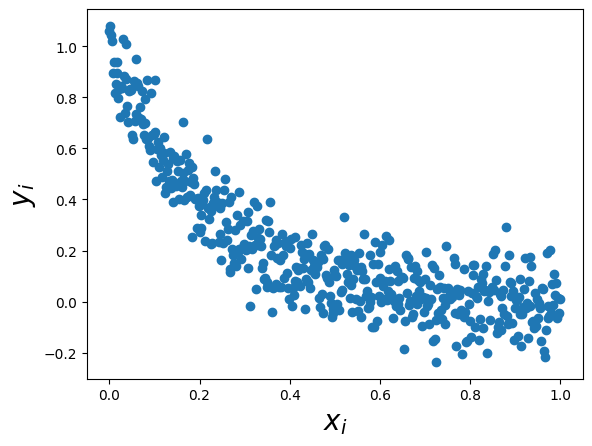

In [15]:
plt.scatter(x,y)
plt.xlabel('$x_i$', fontsize=20)
plt.ylabel('$y_i$', fontsize=20)
plt.show()

In [16]:
def f(u):
    return max(np.abs(np.exp(-x*u**2) -y))

In [17]:
u = np.linspace(0,10,40)
f_u = np.vectorize(f)(u)

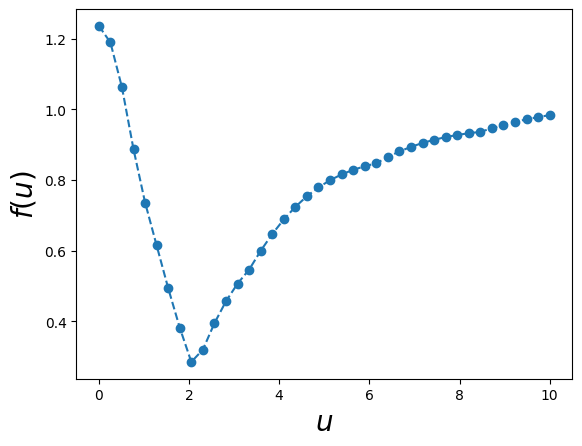

In [18]:
plt.plot(u, f_u, 'o--')
plt.xlabel('$u$', fontsize=20)
plt.ylabel('$f(u)$', fontsize=20)
plt.show()

In [19]:
dfdu = np.vectorize(derivative)(f, u, dx=1e-6)

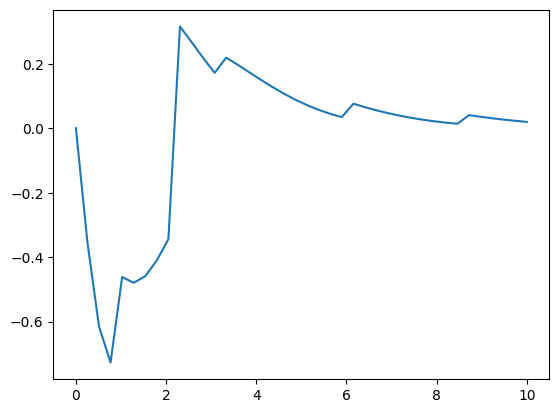

In [20]:
plt.plot(u, dfdu)